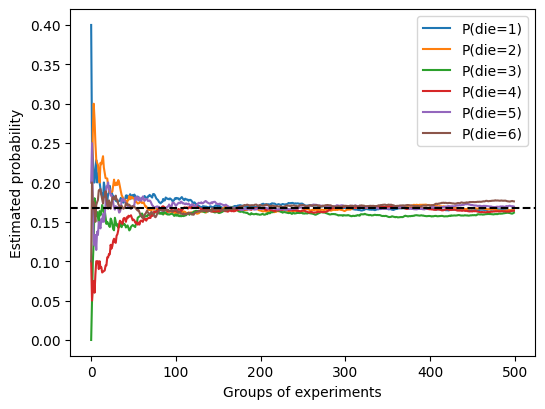

In [1]:
%matplotlib inline
import random
from mxnet import np, npx
import matplotlib.pyplot as plt


# def use_svg_display():  #@save
#     """使用svg格式在Jupyter中显示绘图"""
#     backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
#     use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
    
npx.set_np()
fair_probs = [1.0 / 6] * 6
n =1000
counts = np.random.multinomial(n, fair_probs).astype(np.float32)
counts = counts/n
counts = np.random.multinomial(10, fair_probs, size=500)

cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

set_figsize(figsize=(6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();